In [1]:
%reload_ext autoreload
%autoreload 2

import os
import argparse
import sys
import time

import numpy as np
from multiprocess import Pool

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

%matplotlib inline

Setting environment for Precision WorkStation


No vtk
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from aligner_v3 import Aligner

In [3]:
stack = 'CHATM3'

In [4]:
stack_m_spec = dict(name='atlasV6',
                   vol_type='score',
#                    structure=structure_m,
                    resolution='10.0um'
                   )

stack_f_spec = dict(name=stack,
                   vol_type='score',
                   detector_id=799,
#                    structure=convert_to_original_name(structure_m),
                    resolution='10.0um'
                   )

global_alignment_spec = dict(stack_m=stack_m_spec, 
                      stack_f=stack_f_spec,
                      warp_setting=20)

In [5]:
global_aligner_parameters = generate_aligner_parameters_v2(alignment_spec=global_alignment_spec,
# structures_m=['5N_L', '5N_R', '6N_L', '6N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'Amb_L', 'Amb_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'RMC_L', 'RMC_R', 'SNC_L', 'SNC_R', 'SNR_L', 'SNR_R', '3N_L', '3N_R', '4N_L', '4N_R', 'Sp5C_L', 'Sp5C_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R', 'DC_L', 'DC_R', 'AP', '12N', 'SC', 'IC'],
# structures_m=['5N_L', '5N_R', '7N_L', '7N_R', '7n_L', '7n_R', 'LC_L', 'LC_R', 'LRt_L', 'LRt_R', 'Pn_L', 'Pn_R', 'Tz_L', 'Tz_R', 'VLL_L', 'VLL_R', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', '12N', 'SC', 'IC']
# structures_m=['7N_L'],
# structures_m=['RMC_L', '3N_L', 'SNR_L'],
# structures_m=['5N_L', '7N_L', '7n_L', '5N_R', '7N_R', '7n_R']
#  structures_m=['VCA_L', 'VCA_R']
# structures_m=['5N_L', '7N_L', '7n_L', 'LC_L',  'LRt_L', 'Pn_L', 'Tz_L', 'VLL_L',  'SNR_L', 'Sp5C_L', '12N', 'SC', 'IC'],
structures_m=['3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '7N_L', '7N_R', '10N_L', '10N_R', '12N'],
fixed_structures_are_sided=True,
fixed_surroundings_have_positive_value=False,
                                                           fixed_use_surround=False
)

upstream_warp_id                                               None
transform_type                                               affine
terminate_thresh                                                NaN
grad_computation_sample_number                                10000
grid_search_sample_number                                       NaN
std_tx_um                                                      2000
std_ty_um                                                      2000
std_tz_um                                                      2000
std_theta_xy_degree                                              30
surround_weight                                                 NaN
regularization_weight                                           NaN
comment                           global reg no surr no grid search
max_iter_num                                                    200
Unnamed: 14                                                     NaN
Name: 20, dtype: object
surround nan False


Prior structure/index map not found. Generating a new one.
Loaded moving volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '7N_L', '7N_R'].
Prior structure/index map not found. Generating a new one.


voxel size for moving = 10.00 um
voxel size for fixed = 10.00 um
label_mapping_m2f {1: 2, 2: 11, 3: 9, 4: 6, 5: 5, 6: 8, 7: 3, 8: 4, 9: 10, 10: 1, 11: 7}
{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0}


Loaded fixed volumes: ['10N_L', '10N_R', '12N', '3N_L', '3N_R', '4N_L', '4N_R', '5N_L', '5N_R', '7N_L', '7N_R'].


In [6]:
from aligner_v3 import Aligner

In [7]:
aligner = Aligner(global_aligner_parameters['volume_fixed'], 
                  global_aligner_parameters['volume_moving'], 
                  labelIndexMap_m2f=global_aligner_parameters['label_mapping_m2f'])

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


In [8]:
T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol = bp.unpack_ndarray_file('/home/yuncong/' + stack_f_spec['name'] + '_T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.bp')

aligner.set_initial_transform(params=T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol.flatten())

# aligner.set_centroid(centroid_m='structure_centroid', 
#                      centroid_f='centroid_m',
#                     indices_m=[local_aligner_parameters['structure_to_label_moving'][structure_m]])

aligner.set_centroid(centroid_m='origin', 
                     centroid_f='volume_centroid')

aligner.compute_gradient(smooth_first=True)

Set initial transform to [ 9.87580130e-01  1.57126095e-01  0.00000000e+00  1.26509838e+03
 -1.57126095e-01  9.87580130e-01  0.00000000e+00  4.90968802e+02
  0.00000000e+00  0.00000000e+00  1.00000000e+00  4.60000000e+02].
centroid_m: [1265.09837867  490.96880185  460.        ], centroid_f: [1369  408  457]
indices_f: set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])


In [9]:
aligner.set_label_weights(label_weights=global_aligner_parameters['label_weights_m'])

In [ ]:
_, _ = aligner.optimize(tf_type=global_aligner_parameters['transform_type'], 
#                             max_iter_num=0,
                             max_iter_num=5000,
                             history_len=100, 
                             terminate_thresh_trans=.01,
                        terminate_thresh_rot=0.02,
                        grad_computation_sample_number=1000,
#                              full_lr=np.array([1,1,1,.01,.01,.01]),
                            lr1=10, lr2=.1,
                        affine_scaling_limits=(.9, 1.2)
                            )

Best parameters =
[[  0.9         -1.08087222  -0.40170354 -35.54712637]
 [ -0.37470005   0.9          0.18853183   4.31976699]
 [  0.20187115   0.30235071   0.9        -25.70485315]]
Best score = -0.0002996787649500952 , initial score = -0.0020470297815166


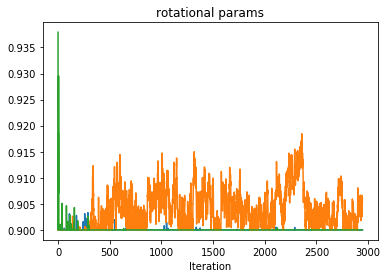

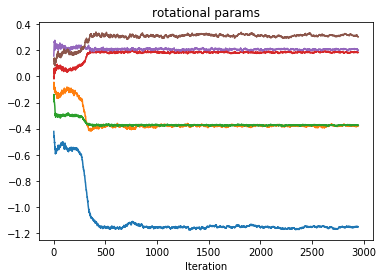

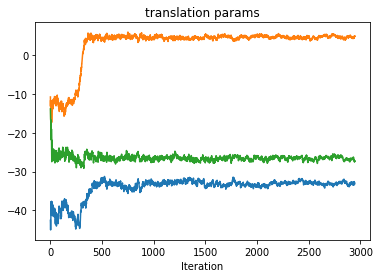

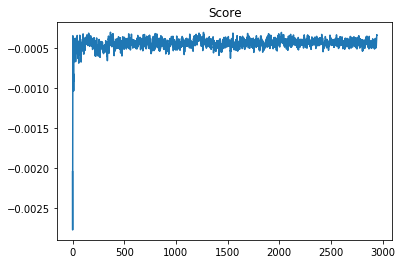

In [19]:
plot_alignment_results(traj=aligner.Ts[10:], scores=aligner.scores[10:], select_best='max_value')

In [ ]:


plot_alignment_results(traj=aligner.Ts, scores=aligner.scores, select_best='max_value')

tf_atlas_to_subj = compose_alignment_parameters([T_atlas_wrt_canonicalAtlasSpace_subject_wrt_wholebrain_atlasResol, 
                                                         convert_transform_forms(aligner=aligner, out_form=(3,4))])

DataManager.save_alignment_results_v3(transform_parameters=convert_transform_forms(transform=tf_atlas_to_subj, out_form='dict'),
                       score_traj=aligner.scores,
                       parameter_traj=aligner.Ts,
                      alignment_spec=local_alignment_spec)


tf_atlas_to_subj = DataManager.load_alignment_results_v3(local_alignment_spec, what='parameters', out_form=(4,4))

name_s = structure_m

atlas_structure_wrt_canonicalAtlasSpace_atlasResol = DataManager.load_original_volume_v2(stack_spec=stack_m_spec, bbox_wrt='canonicalAtlasSpace', structure=name_s)

aligned_structure_wrt_wholebrain_inputResol = \
transform_volume_v4(volume=atlas_structure_wrt_canonicalAtlasSpace_atlasResol,
                    transform=tf_atlas_to_subj,
                    return_origin_instead_of_bbox=True)

DataManager.save_transformed_volume_v2(volume=aligned_structure_wrt_wholebrain_inputResol, 
                                       alignment_spec=local_alignment_spec)